In [1]:
!pip install oauth2
!pip install django

  Using cached oauth2-1.9.0.post1-py2.py3-none-any.whl
  Using cached httplib2-0.10.3.tar.gz
  Running setup.py bdist_wheel for httplib2: started
  Running setup.py bdist_wheel for httplib2: finished with status 'done'
  Stored in directory: C:\Users\Paula\AppData\Local\pip\Cache\wheels\ca\ac\5f\749651f7925b231103f5316cacca82a487810c22d30f011c0c
Successfully built httplib2
  Using cached Django-1.11.2-py2.py3-none-any.whl


In [56]:
import oauth2 as oauth
import urllib2 as urllib
import json
from django.utils.encoding import smart_str
import matplotlib.pyplot as plt
import bokeh
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import show, output_notebook
from bokeh.layouts import row, column, gridplot
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
import pandas as pd
import numpy as np

In [57]:
# coding: utf-8

def is_ascii(s):
    return all(ord(c) < 128 for c in s)

api_key = "YU0KmCt8JMhSml0EwurQDvUtv"
api_secret = "Iuu7zawVK2zmMJMeRgFGDl19LsqhkQs19MmKNUZSrCh7qk5oCq"
access_token_key = "825902122893971458-KMgjVVWqMibax6bDz8IwqOhzzQCQgnf"
access_token_secret = "wdfiGxkPBoRa6pWyhQE5FW2soUUAMeOCnuzKpVeSvIlGI"

_debug = 0

oauth_token    = oauth.Token(key=access_token_key, secret=access_token_secret)
oauth_consumer = oauth.Consumer(key=api_key, secret=api_secret)

signature_method_hmac_sha1 = oauth.SignatureMethod_HMAC_SHA1()

http_method = "GET"


http_handler  = urllib.HTTPHandler(debuglevel=_debug)
https_handler = urllib.HTTPSHandler(debuglevel=_debug)

def twitterreq(url, method, parameters):
    req = oauth.Request.from_consumer_and_token(oauth_consumer,
    token=oauth_token, http_method=http_method, http_url=url,
    parameters=parameters)

    req.sign_request(signature_method_hmac_sha1, oauth_consumer, oauth_token)

    headers = req.to_header()

    if http_method == "POST":
        encoded_post_data = req.to_postdata()
    else:
        encoded_post_data = None
        url = req.to_url()

    opener = urllib.OpenerDirector()
    opener.add_handler(http_handler)
    opener.add_handler(https_handler)

    response = opener.open(url, encoded_post_data)

    return response

#def fetchsamples():
 #   url = "https://stream.twitter.com/1.1/statuses/sample.json"
  #  parameters = []
  #  response = twitterreq(url, "GET", parameters)
   # for line in response:
    #    print line.strip()

def create_dictionary(sentiment):
    afinn_file  = sentiment
    scores = {}
    for line in afinn_file:
        term, score = line.split('\t')
        scores[term] = int(score)
    return scores

def create_west_coast_list(tweets):
    tweets_list = tweets
    list_of_tweets = []
    for line in tweets_list:
        tweet = json.loads(line)
        if tweet.has_key('user'):
            user = tweet["user"]
            if(user.has_key("location") and user["location"] is not None):
                location = user["location"]
                if(type(location) is not str):
                    location = smart_str(location)
                if(not is_ascii(location)):
                   continue
                #print(location)
                if(location.endswith(", CA") or location.endswith(", OR") or location.endswith(", WA") or location.endswith(", HI") or location.endswith(", AK")):
                    if tweet.has_key('text'):
                        text = tweet['text']
                        text = smart_str(text)
                        text = unicode( text, "utf-8" )
                        list_of_tweets.append(text)
    return list_of_tweets

def create_east_coast_list(tweets):
    tweets_list = tweets
    list_of_tweets = []
    for line in tweets_list:
        tweet = json.loads(line)
        if tweet.has_key('user'):
            user = tweet["user"]
            if(user.has_key("location") and user["location"] is not None):
                location = user["location"]
                if(type(location) is not str):
                    location = smart_str(location)
                if(not is_ascii(location)):
                   continue
                #print(location)
                if(location.endswith(", VA") or location.endswith(", DE") or location.endswith(", DC") or location.endswith(", PA") or location.endswith(", NJ") or location.endswith(", NY") or location.endswith(", ME") or location.endswith(", MA") or location.endswith(", NH") or location.endswith(", VT") or location.endswith(", CT")):
                    if tweet.has_key('text'):
                        text = tweet['text']
                        text = smart_str(text)
                        text = unicode( text, "utf-8" )
                        list_of_tweets.append(text)
    return list_of_tweets

def create_south_list(tweets):
    tweets_list = tweets
    list_of_tweets = []
    for line in tweets_list:
        tweet = json.loads(line)
        if tweet.has_key('user'):
            user = tweet["user"]
            if(user.has_key("location") and user["location"] is not None):
                location = user["location"]
                if(type(location) is not str):
                    location = smart_str(location)
                if(not is_ascii(location)):
                   continue
                #print(location)
                if(location.endswith(", TX") or location.endswith(", OK") or location.endswith(", LA") or location.endswith(", MS") or location.endswith(", AR") or location.endswith(", FL") or location.endswith(", AL") or location.endswith(", GA") or location.endswith(", SC") or location.endswith(", NC") or location.endswith(", MD") or location.endswith(", TN") or location.endswith(", WV")):
                    if tweet.has_key('text'):
                        text = tweet['text']
                        text = smart_str(text)
                        text = unicode( text, "utf-8" )
                        list_of_tweets.append(text)
    return list_of_tweets

def create_midwest_list(tweets):
    tweets_list = tweets
    list_of_tweets = []
    for line in tweets_list:
        tweet = json.loads(line)
        if tweet.has_key('user'):
            user = tweet["user"]
            if(user.has_key("location") and user["location"] is not None):
                location = user["location"]
                if(type(location) is not str):
                    location = smart_str(location)
                if(not is_ascii(location)):
                   continue
                #print(location)
                if(location.endswith(", ND") or location.endswith(", SD") or location.endswith(", NE") or location.endswith(", KS") or location.endswith(", MN") or location.endswith(", IO") or location.endswith(", MO") or location.endswith(", WI") or location.endswith(", MI") or location.endswith(", OH") or location.endswith(", IL") or location.endswith(", IN") or location.endswith(", KY")):
                    if tweet.has_key('text'):
                        text = tweet['text']
                        text = smart_str(text)
                        text = unicode( text, "utf-8" )
                        list_of_tweets.append(text)
    return list_of_tweets

def create_rocky_mountains_list(tweets):
    tweets_list = tweets
    list_of_tweets = []
    for line in tweets_list:
        tweet = json.loads(line)
        if tweet.has_key('user'):
            user = tweet["user"]
            if(user.has_key("location") and user["location"] is not None):
                location = user["location"]
                if(type(location) is not str):
                    location = smart_str(location)
                if(not is_ascii(location)):
                   continue
                #print(location)
                if(location.endswith(", MT") or location.endswith(", ID") or location.endswith(", WY") or location.endswith(", NE") or location.endswith(", UT") or location.endswith(", CO") or location.endswith(", AZ") or location.endswith(", NM")):
                    if tweet.has_key('text'):
                        text = tweet['text']
                        if(is_ascii(text)):
                            if(type(text) is not str):
                                continue
                            list_of_tweets.append(text)
    return list_of_tweets

def calculate_scores(tweets, dictionary):
    scores = []
    for i in tweets:
        score = 0
        words_list = i.split()
        for i in words_list:
            if i in dictionary:
                score = score + dictionary[i]
        scores.append(score)
    return scores

if __name__ == '__main__':

    list_tweets = []
    scores_west_coast = []
    scores_east_coast = []
    scores_south = []
    scores_midwest = []
    scores_rocky_mountains = []

#    fetchsamples()

    sent_file = open("AFINN-111.txt")
   #tweet_file = open("three_minutes_tweets.json")
    tweet_file = open("tweets.json")
    dictionary = create_dictionary(sent_file)

    west_coast_tweets = create_west_coast_list(tweet_file)
    
    sent_file = open("AFINN-111.txt")
    #tweet_file = open("three_minutes_tweets.json")
    tweet_file = open("tweets.json")
    dictionary = create_dictionary(sent_file)

    east_coast_tweets = create_east_coast_list(tweet_file)
    sent_file = open("AFINN-111.txt")
    #tweet_file = open("three_minutes_tweets.json")
    tweet_file = open("tweets.json")
    dictionary = create_dictionary(sent_file)

    south_tweets = create_south_list(tweet_file)
    sent_file = open("AFINN-111.txt")
    #tweet_file = open("three_minutes_tweets.json")
    tweet_file = open("tweets.json")
    dictionary = create_dictionary(sent_file)

    midwest_tweets = create_midwest_list(tweet_file)
    sent_file = open("AFINN-111.txt")
    #tweet_file = open("three_minutes_tweets.json")
    tweet_file = open("tweets.json")
    dictionary = create_dictionary(sent_file)

    rocky_mountains_tweets = create_rocky_mountains_list(tweet_file)

    scores_west_coast = calculate_scores(west_coast_tweets, dictionary)
    scores_east_coast = calculate_scores(east_coast_tweets, dictionary)
    scores_south = calculate_scores(south_tweets, dictionary)
    scores_midwest = calculate_scores(midwest_tweets, dictionary)
    scores_rocky_mountains = calculate_scores(rocky_mountains_tweets, dictionary)
    
    print(west_coast_tweets)
    """print(east_coast_tweets)
    print(south_tweets)
    print(midwest_tweets)
    print(rocky_mountains_tweets)
    print(scores_west_coast)
    print(scores_east_coast)
    print(scores_south)
    print(scores_midwest)
    print(scores_rocky_mountains)"""

[u'@Conplay_ 3v3 $100', u'RT @DrewsOfficial_: When they ask what your name is when u order \U0001f4af\U0001f602 http://t.co/ysGeFwQ7K1', u'@DanielleLynn_S me alegro que te gustara -sonrio- #WeddingBladek', u'@Doobybrain pros - sound is awesome, easy to set up. Cons - expensive to integrate with existing HiFi, no Bluetooth', u'@harryoops_hiii \u043f\u043e\u043a\u0435*', u'RT @TheDrizzyBible: 6 God x Ye http://t.co/YQrVrUauQ5', u'RT @teresaferrande2: OMAIGAH @Moonii_2000  https://t.co/rwEijF7T4s', u'Ohh das why', u"@snoop_a_loop14 I'm in a good mood today \U0001f607\U0001f602", u'RT @SimonZanessa24: Yes..Ht for mamaya #AlDubTrueLoveWaits', u'Partner Support Center Coordinator job - Uber Technologies - Los Angeles, CA http://t.co/YseiNmIzRF', u"How VA's Have Made Josh Stanton A Better Leader - http://t.co/IOpYMc5MYA #entrepreneur #\u2026 http://t.co/WmGrP29iFT http://t.co/LG0touleQS", u'RT @oliviaculpo: I love this http://t.co/gk8LhaBNZv', u'RT @iMuhannad4: @Flimrz \u0627\u0645\u064a\u064

In [58]:
    print(midwest_tweets)

[u'Jennifer Lawrence \u3004 #HappyBirthdayJenniferLawrence. 15082015 \u2327 mdd/jenniferlawrence | B\u039eST about j.law \U0001f4be http://t.co/ZxL24qP3Ao', u'RT @JaneenVovak: http://t.co/hv7a9OCa7H money making forum', u'Turns out today is National roller coaster day.. what a coincidence', u'RT @abbster2012: People who want to share their religious views with you almost never want you to share yours with them', u'Lauth Investigations International: Document Investigator (#Indianapolis, IN) http://t.co/SrnirRtmp7 #Job #Jobs #Hiring #CareerArc', u'RT @IAFF526_LexFire: Engine 2 &amp; EC1 on scene of a victim with a knife wound. #lexfire', u'RT @_Breskii_18: RT if you get this \U0001f602 http://t.co/sadzqKIsqk', u'http://t.co/nDtTuAG4FE', u'When your in the middle of crying and then you get a random nose bleed....', u'RT @HotMulligan: Hot Mulligan #WeirdTour2K15\n\nThanks to @platback for the flyer http://t.co/rCJYEVqGhf', u'When you both have a coke addiction http://t.co/IY6mbQjvzQ', u'I

In [59]:
west_coast_df = pd.DataFrame({
    "west coast tweets": west_coast_tweets,
    "scores tweets west coast": scores_west_coast
})
west_coast_df

,scores tweets west coast,west coast tweets
0,0,@Conplay_ 3v3 $100
1,0,RT @DrewsOfficial_: When they ask what your na...
2,0,@DanielleLynn_S me alegro que te gustara -sonr...
3,0,"@Doobybrain pros - sound is awesome, easy to s..."
4,0,@harryoops_hiii поке*
5,0,RT @TheDrizzyBible: 6 God x Ye http://t.co/YQr...
6,0,RT @teresaferrande2: OMAIGAH @Moonii_2000 htt...
7,0,Ohh das why
8,3,@snoop_a_loop14 I'm in a good mood today 😇😂
9,0,RT @SimonZanessa24: Yes..Ht for mamaya #AlDubT...


In [60]:
east_coast_df = pd.DataFrame({
    "east coast tweets": east_coast_tweets,
    "scores tweets east coast": scores_east_coast
})
east_coast_df

,east coast tweets,scores tweets east coast
0,M.T.A. N.Y.C. Subways: 6 Train normal service...,0
1,"RT @TrumanProject: It's been the #1 ""Most Read...",0
2,"#NewYork #Albany #Buffalo In Iowa, Sanders say...",0
3,@Canine_Rights pls stand for truth be it eithe...,0
4,Congratulations to Team Relentless athlete Jar...,0
5,A customer told me the @ was called an ampersa...,-2
6,RT @GoPittFootball: The Giant Killer @pittbost...,2
7,@JaroslavWrestle Aaron did not dissapoint! Gre...,0
8,Fur vests are too cute! http://t.co/SamOwumgH7,0
9,"Meet Shawn Wooden, the former player at the ce...",0


In [61]:
south_df = pd.DataFrame({
    "south tweets": south_tweets,
    "scores tweets south": scores_south
})
south_df

,scores tweets south,south tweets
0,0,RT @quotes4writers: Elie Wiesel: Words can som...
1,2,You really gotta be careful who you trust.
2,-1,Life is hard apart.. It will only get harder t...
3,0,http://t.co/oxZzR5LM0m Unsettling: Footage Of ...
4,0,He played
5,-1,@orlsportsdaily Same reason that ESPN schedule...
6,0,"12"" Western Leather Horse Pleasure Pony Youth ..."
7,0,😆😊💯 https://t.co/feI2brIEee
8,0,@marceelangel Feliz Día Pipi!!
9,0,RT @DizFilipeRet: Com erva da boa o pensamento...


In [68]:
midwest_df = pd.DataFrame({
    "midwest tweets": midwest_tweets,
    "scores tweets midwest": scores_midwest
})
midwest_df

,midwest tweets,scores tweets midwest
0,Jennifer Lawrence 〄 #HappyBirthdayJenniferLawr...,0
1,RT @JaneenVovak: http://t.co/hv7a9OCa7H money ...,0
2,Turns out today is National roller coaster day...,0
3,RT @abbster2012: People who want to share thei...,4
4,Lauth Investigations International: Document I...,0
5,RT @IAFF526_LexFire: Engine 2 &amp; EC1 on sce...,-3
6,RT @_Breskii_18: RT if you get this 😂 http://...,0
7,http://t.co/nDtTuAG4FE,0
8,When your in the middle of crying and then you...,-2
9,RT @HotMulligan: Hot Mulligan #WeirdTour2K15\n...,0


In [63]:
rocky_mountains_df = pd.DataFrame({
    "rocky mountains tweets": rocky_mountains_tweets,
    "scores tweets rocky mountains": scores_rocky_mountains
})
rocky_mountains_df

,rocky mountains tweets,scores tweets rocky mountains


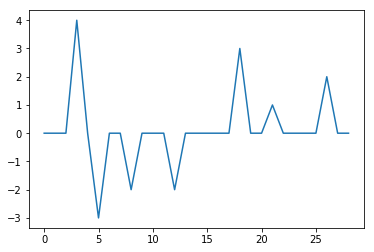

In [64]:
plt.plot(scores_midwest)
plt.show()

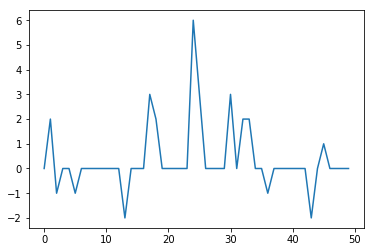

In [79]:
plt.plot(scores_south)
plt.show()

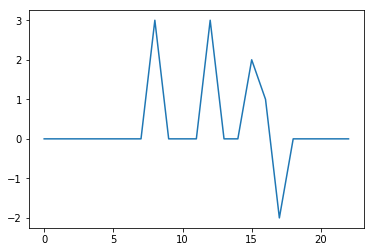

In [80]:
plt.plot(scores_west_coast)
plt.show()

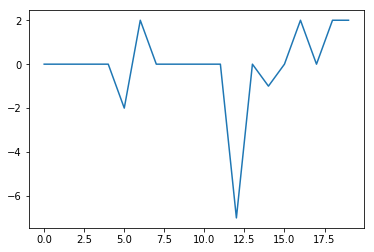

In [81]:
plt.plot(scores_east_coast)
plt.show()

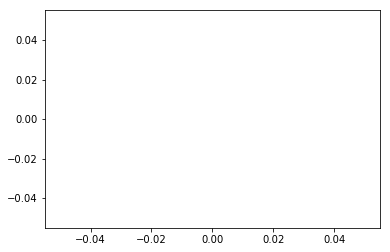

In [82]:
plt.plot(scores_rocky_mountains)
plt.show()

In [88]:
sum_south = 0
for i in scores_south:
    sum_south = sum_south + i
avg_south = sum_south/len(scores_south)

sum_midwest = 0
for i in scores_midwest:
    sum_midwest = sum_midwest + i
avg_midwest = sum_midwest/len(scores_midwest)

sum_west_coast = 0
for i in scores_west_coast:
    sum_west_coast = sum_west_coast + i
avg_west_coast = sum_west_coast/len(scores_west_coast)

sum_east_coast = 0
for i in scores_east_coast:
    sum_east_coast = sum_east_coast + i
avg_east_coast = sum_east_coast/len(scores_east_coast)

sum_rocky_mountains = 0
for i in scores_rocky_mountains:
    sum_rocky_mountains = sum_rocky_mountains + i
avg_rocky_mountains = 0

avg = [avg_south, avg_midwest, avg_west_coast, avg_east_coast, avg_rocky_mountains]

p = figure(x_axis_label = "scores_south", y_axis_label = "scores_midwest")
p.circle(scores_south, avg)
output_notebook()
show(p)

D:\anaconda2\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


Loading BokehJS ...

In [ ]:
from bokeh.charts import BoxPlot, output_file, show
from bokeh.sampledata.autompg import autompg as df

# Use Bokeh chart to make plot
p = bokeh.charts.BoxPlot(sdf, values='scores', label='scores', xlabel='scores', ylabel='scores')

# Display it
bokeh.io.show(p)

In [6]:
scores_south = [2,3,5,-5,8,3-2]
sum_south = 0
for i in scores_south:
    sum_south = sum_south + i
avg_south = sum_south/len(scores_south)

scores_midwest = [-5, -2, -3, -3, 0, 3, 2, 1, 1, 0]
sum_midwest = 0
for i in scores_midwest:
    sum_midwest = sum_midwest + i
avg_midwest = sum_midwest/len(scores_midwest)

scores_west_coast = [2, 4, 0, 0, 1, -3, -4, 0, 0, -1]
sum_west_coast = 0
for i in scores_west_coast:
    sum_west_coast = sum_west_coast + i
avg_west_coast = sum_west_coast/len(scores_west_coast)

scores_east_coast = [4, 0, -1, 4, 3, 2, 0, 0, -3]
sum_east_coast = 0
for i in scores_east_coast:
    sum_east_coast = sum_east_coast + i
avg_east_coast = sum_east_coast/len(scores_east_coast)

scores_rocky_mountains = [1, 4, 0, 0, 0, -2, -3, 0, 0, 1, -1]
sum_rocky_mountains = 0
for i in scores_rocky_mountains:
    sum_rocky_mountains = sum_rocky_mountains + i
avg_rocky_mountains = sum_rocky_mountains/len(scores_rocky_mountains)

avg = [avg_south, avg_midwest, avg_west_coast, avg_east_coast, avg_rocky_mountains]

p = figure(x_axis_label = "scores_south", y_axis_label = "scores_south")
p.circle(scores_south, avg)
q = figure(x_axis_label = "scores_midwest", y_axis_label = "scores_midwest")
q.circle(scores_midwest, avg)
w = figure(x_axis_label = "scores_wc", y_axis_label = "scores_wc")
w.circle(scores_west_coast, avg)
e = figure(x_axis_label = "scores_ec", y_axis_label = "scores_ec")
e.circle(scores_east_coast, avg)
r = figure(x_axis_label = "scores_rm", y_axis_label = "scores_rm")
r.circle(scores_rocky_mountains, avg)
output_notebook()
show(p)
show(q)
show(w)
show(e)
show(r)

D:\anaconda2\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
D:\anaconda2\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
D:\anaconda2\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
D:\anaconda2\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
D:\anaconda2\lib\site-packages\bokeh\models\sources.py:89: BokehUserWarning:

Loading BokehJS ...

In [89]:
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.iris import flowers

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

output_file("iris.html", title="iris.py example")

show(p)

In [105]:
from __future__ import print_function

import numpy as np
import pandas as pd

from bokeh.util.browser import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models.glyphs import Circle, Line
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Range1d
from bokeh.resources import INLINE

raw_columns=[
[10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58, 7, 8],
[8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76, 7, 8],
[13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71, 7, 8],
[9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84, 7, 8],
[11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47, 7, 8],
[14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04, 7, 8],
[6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25, 7, 8],
[4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.5, 7, 8],
[12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56, 7, 8],
[7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91, 7, 8],
[5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89, 7, 8]]

quartet = pd.DataFrame(data=raw_columns, columns=
                       ['Ix','Iy','IIx','IIy','IIIx','IIIy','IVx','IVy', 'Vx','Vy'])


circles_source = ColumnDataSource(
    data = dict(
        xi   = quartet['Ix'],
        yi   = quartet['Iy'],
        xii  = quartet['IIx'],
        yii  = quartet['IIy'],
        xiii = quartet['IIIx'],
        yiii = quartet['IIIy'],
        xiv  = quartet['IVx'],
        yiv  = quartet['IVy'],
        xv   = quartet['Vx'],
        yv   = quartet['Vy'],
    )
   )

x = 50
y = 3 + 0.5 * x

lines_source = ColumnDataSource(data=dict(x=x, y=y))

xdr = Range1d(start=-50.5, end=50.5)
ydr = Range1d(start=-50.5, end=50.5)

def make_plot(title, xname, yname):
    plot = Plot(x_range=xdr, y_range=ydr, plot_width=400, plot_height=400,
                border_fill_color='white', background_fill_color='#e9e0db')
    plot.title.text = title

    xaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(xaxis, 'below')

    yaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(yaxis, 'left')

    plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
    plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

    line = Line(x='x', y='y', line_color="#666699", line_width=2)
    plot.add_glyph(lines_source, line)

    circle = Circle(
        x=xname, y=yname, size=12,
        fill_color="#cc6633", line_color="#cc6633", fill_alpha=0.5
    )
    plot.add_glyph(circles_source, circle)

    return plot

#where will this comment show up
I   = make_plot('I',   'xi',   'yi')
II  = make_plot('II',  'xii',  'yii')
III = make_plot('III', 'xiii', 'yiii')
IV  = make_plot('IV',  'xiv',  'yiv')
V   = make_plot('V', 'xv', 'yv')

grid = gridplot([[I, II], [III, IV]], [V], toolbar_location=None)

doc = Document()
doc.add_root(grid)

if __name__ == "__main__":
    doc.validate()
    filename = "anscombe.html"
    with open(filename, "w") as f:
        f.write(file_html(doc, INLINE, "Anscombe's Quartet"))
    print("Wrote %s" % filename)
    view(filename)

ValueError: expected an element of ColumnData(String, Seq(Any)), got {'y': 28.0, 'x': 50}